<a href="https://colab.research.google.com/github/likhon15-4915/Research-Innovation/blob/main/SkinD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import time
st=time.time()

In [3]:
!nvidia-smi

Sun Jun  9 14:01:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import numpy as np
import pandas as pd
import os
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
BAC="/content/drive/MyDrive/Research and Innovation/Image/skin-disease-datasaet/skinD/BA- cellulitis"
BAI="/content/drive/MyDrive/Research and Innovation/Image/skin-disease-datasaet/skinD/BA-impetigo"
FUA="/content/drive/MyDrive/Research and Innovation/Image/skin-disease-datasaet/skinD/FU-athlete-foot"
FUN="/content/drive/MyDrive/Research and Innovation/Image/skin-disease-datasaet/skinD/FU-nail-fungus"
FUR="/content/drive/MyDrive/Research and Innovation/Image/skin-disease-datasaet/skinD/FU-ringworm"
PAC="/content/drive/MyDrive/Research and Innovation/Image/skin-disease-datasaet/skinD/PA-cutaneous-larva-migrans"
VIC="/content/drive/MyDrive/Research and Innovation/Image/skin-disease-datasaet/skinD/VI-chickenpox"
VIS="/content/drive/MyDrive/Research and Innovation/Image/skin-disease-datasaet/skinD/VI-shingles"

In [6]:
for i in os.listdir ("/content/drive/MyDrive/Research and Innovation/Image/skin-disease-datasaet/skinD"):
  print(i,len(os.listdir("/content/drive/MyDrive/Research and Innovation/Image/skin-disease-datasaet/skinD"+i)))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Research and Innovation/Image/skin-disease-datasaet/skinDBA-impetigo'

In [7]:
def get_path_image(folder):
    image_paths = []
    image_fnames = os.listdir(folder)
    for img_id in range(len(image_fnames)):
        img = os.path.join(folder,image_fnames[img_id])
        image_paths.append(img)

    return image_paths

In [8]:
img_data = []

for i in [BAC,BAI,FUA,FUN,FUR,PAC,VIC,VIS]:
    paths = get_path_image(i)
    img_data.extend(paths)
print(len(img_data))

1127


In [9]:
data = {"img_data":img_data,
        "labels":[np.nan for x in range(len(img_data))]}

data = pd.DataFrame(data)

In [10]:
data["labels"][0:170] = 0
data["labels"][170:270] = 1
data["labels"][270:394] = 2
data["labels"][394:556] = 3
data["labels"][556:669] = 4
data["labels"][669:794] = 5
data["labels"][794:964] = 6
data["labels"][964:1127] = 7

<ipython-input-10-0865e4b3c997>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["labels"][0:170] = 0
<ipython-input-10-0865e4b3c997>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["labels"][170:270] = 1
<ipython-input-10-0865e4b3c997>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["labels"][270:394] = 2
<ipython-input-10-0865e4b3c997>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [11]:
data["labels"] = data["labels"].astype("float64")

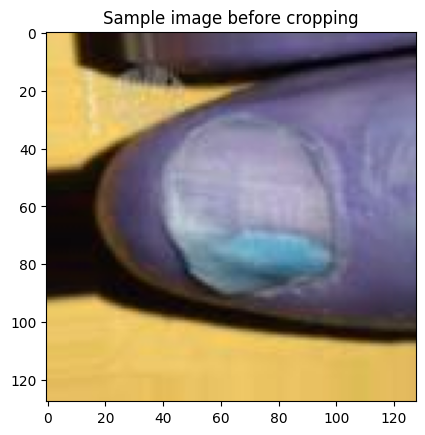

In [12]:
image = cv.imread(data["img_data"][400])
plt.imshow(image)
plt.title("Sample image before cropping")
plt.show()

In [13]:
img_list = []
for i in range(len(img_data)):
    image = cv.imread(data["img_data"][i])
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]

    result = cv.bitwise_and(image, image, mask=thresh)
    result[thresh==0] = [255,255,255]
    (x, y, z_) = np.where(result > 0)
    mnx = (np.min(x))
    mxx = (np.max(x))
    mny = (np.min(y))
    mxy = (np.max(y))
    crop_img = image[mnx:mxx,mny:mxy,:]
    crop_img_r = cv.resize(crop_img, (500,400))
    img_list.append(crop_img_r)

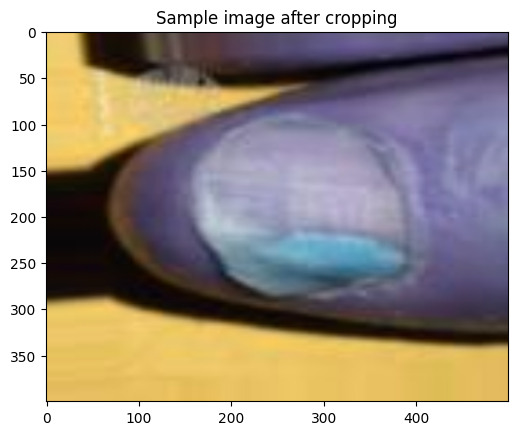

In [14]:
plt.imshow(img_list[400])
plt.title("Sample image after cropping")
plt.show()

In [15]:
from tensorflow.keras.applications import ResNet50, ResNet101
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import MobileNetV2
#from transformers import ViTImageProcessor, ViTModel
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input

In [16]:
def feature_extract(model):
    if model == "VGG19": model = VGG19(weights='imagenet',include_top=False, pooling="avg")
    elif model == "ResNet50": model = ResNet50(weights='imagenet',include_top=False,pooling="avg")
    elif model == "ResNet101": model = ResNet101(weights='imagenet',include_top=False,pooling="avg")
    elif model == "InceptionV3": model = InceptionV3(weights='imagenet', include_top=False, pooling="avg")
    elif model == "DenseNet121": model = DenseNet121(weights='imagenet', include_top=False, pooling="avg")
    elif model == "MobileNetV2": model = MobileNetV2(weights='imagenet', include_top=False, pooling="avg")
    else:
      raise ValueError("Unsupported model name: " + model)
    return model

In [17]:
model = feature_extract("ResNet50") # or "VGG19", "ResNet101","InceptionV3","DenseNet121","MobileNetV2"

94765736/94765736 [==============================] - 3s 0us/step


In [18]:
from PIL import Image

features_list = []
for i in range(len(img_list)):

    image = img_list[i].reshape(-1, 500, 400, 3)
    image = preprocess_input(image)

    """
    # Reshaping when VGG19 model is selected
    features = model.predict(image).reshape(512,)
    """

    #Reshaping  when ResNet50 or ResNet101 model or InceptionV3 is selected 2048
    #for vgg19 shape is 512
    #DenseNet121 shape is 1024
    #MobileNetV2 shape is 1280

    features = model.predict(image).reshape(2048,)

    '''#Only for ViT
    image = img_list[i]
    image = preprocess_input(image)
    image = (image - image.min()) / (image.max() - image.min())  # Rescale to the range [0, 1]

    # Convert to PIL image
    image = (image * 255).astype(np.uint8)
    image = Image.fromarray(image)

    inputs = processor(images=image, return_tensors="pt")

    outputs = model(**inputs)
    features = outputs.last_hidden_state
    features = features.squeeze(0)  # Remove batch dimension'''

    features_list.append(features)

1/1 [==============================] - 0s 23ms/step


In [19]:
features_df = pd.DataFrame(features_list)

In [20]:
features_df["labels"] = data["labels"]

In [21]:
x = features_df.drop(['labels'], axis = 1)
y = features_df.loc[:,"labels"].values

In [22]:
x

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.004030,0.012468,0.000000,0.175164,0.015162,0.033463,0.382581,0.100925,0.011300,0.189072,...,0.002305,0.0,0.000557,0.003723,0.183331,0.000000,8.544955,0.000000,0.000000,0.092699
1,0.127563,0.005507,0.000000,0.788781,0.917365,0.012392,0.493445,0.179876,0.000000,0.040629,...,0.012944,0.0,0.037148,0.000000,0.492859,0.000833,8.197169,0.021440,0.579208,0.190435
2,0.061613,0.000000,0.068296,0.195690,0.185278,0.015139,0.364140,0.001940,0.000369,0.090117,...,0.025901,0.0,0.288612,0.000000,0.011498,0.000054,5.943599,0.001115,0.055005,0.024702
3,0.895689,0.013693,0.121672,0.385768,1.308823,0.000000,0.502023,0.017184,0.054046,0.038859,...,0.111901,0.0,0.015475,0.000000,0.032117,0.108009,6.691233,0.000000,0.822125,0.038155
4,0.098510,0.002245,0.026361,0.206542,0.232409,0.031176,0.589642,0.053159,0.031774,0.061873,...,0.000746,0.0,0.318405,0.000000,0.006370,0.039124,4.777962,0.020580,0.021251,0.014226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,0.999881,0.034020,0.000000,0.018523,0.518083,0.000000,0.941199,0.093109,0.109658,0.225757,...,0.031017,0.0,0.548439,0.012709,0.000000,0.050111,3.578948,0.114938,0.104422,0.018117
1123,0.141927,0.011489,0.008248,0.160724,0.344994,0.044820,0.732429,0.019063,0.191541,0.099109,...,0.232380,0.0,0.652147,0.000095,0.003869,0.000000,4.953139,0.192474,0.295791,0.003175
1124,0.099452,0.000000,0.000000,1.015078,0.420767,0.000000,0.057722,0.154635,0.000000,0.068583,...,0.000000,0.0,0.016232,0.000465,0.930138,0.000000,8.505007,0.093739,0.417851,0.016158
1125,0.095779,0.006708,0.009120,0.279037,0.231302,0.000799,0.656899,0.217966,0.004422,0.121618,...,0.051250,0.0,0.000352,0.000000,0.095221,0.001594,5.148311,0.128695,0.276931,0.373280


In [23]:
print(f"Number of features before feature selection: {x.shape[1]}")

Number of features before feature selection: 2048


In [24]:
y

array([0., 0., 0., ..., 7., 7., 7.])

In [25]:
ets=time.time()
et=ets-st
print(f"Execution time:{et}s")

Execution time:861.4781675338745s


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_ = scaler.transform(x)

In [27]:
x_ = pd.DataFrame(x_)

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def anova_fs():

    selector = SelectKBest(f_classif, k=500) # k is number of features
    selector.fit(x_, y)

    cols = selector.get_support(indices=True)
    anova_x = x_[cols]
    return anova_x

In [29]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

def RFE_fs():
    rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=200, step=0.1)
    rfe_selector.fit(x_, y)

    rfe_support = rfe_selector.support_
    rfe_feature = x_.columns[rfe_support]

    rfe_x = x_[rfe_feature]
    return rfe_x

In [30]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

def rf_fs():
    embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=200, random_state=5), threshold='1.25*median')
    embeded_rf_selector.fit(x_, y)

    embeded_rf_support = embeded_rf_selector.get_support()
    embeded_rf_feature = x_.loc[:,embeded_rf_support].columns.tolist()

    rf_x = x_[embeded_rf_feature]
    return rf_x

In [31]:
from sklearn.linear_model import LassoCV

def ls_fs():
    lasso_selector = LassoCV(max_iter=5000)
    lasso_selector.fit(x_, y)

    selected_features = x_.columns[lasso_selector.coef_ != 0]
    ls_X = x_[selected_features]

    return ls_X

In [32]:
from sklearn.decomposition import PCA

def pca_fs():
    pca = PCA(n_components=500)
    X_pca = pca.fit_transform(x_)
    return X_pca

In [33]:
fs_x = rf_fs() # feature selection methods "rf_fs", "anova_fs", "RFE_fs","pca_fs(x, n_components=10) ","ls_fs"

In [34]:
print(f"Number of features after feature selection: {fs_x.shape[1]}")

Number of features after feature selection: 732


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fs_x, y, test_size = 0.2, random_state = 42)

In [36]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.model_selection import GridSearchCV

In [37]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    prediction_ = knn.predict(x_test)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Best accuracy is 0.8008849557522124 with K = 1


In [38]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)
predicted = knn.predict(x_test)
score = knn.score(x_test, y_test)
knn_score_ = np.mean(score)

print('Accuracy : %.3f' % (knn_score_))

Accuracy : 0.566


In [39]:
p=precision_score(y_test, predicted, average='weighted')
print('Precision : %.3f' % (p))

r=recall_score(y_test, predicted, average='weighted')
print('Recall : %.3f' % (r))

f1=f1_score(y_test, predicted, average='weighted')
print('F1-score: %.3f' % (f1))

f1_w=f1_score(y_test, predicted, average='weighted')
print('Weighted f1-score: %.3f' % (f1_w))

Precision : 0.564
Recall : 0.566
F1-score: 0.549
Weighted f1-score: 0.549


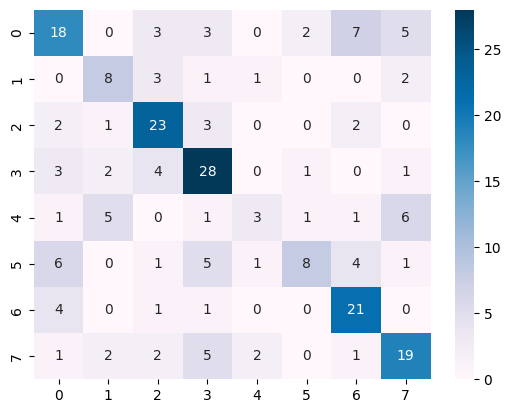

In [40]:
cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, cmap="PuBu", annot=True, fmt='.0f')
plt.show()

In [41]:
param_grid_svm = {'C': [0.1, 1, 10, 100], #1000
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly']}

SVM_grid = GridSearchCV(svm.SVC(), param_grid_svm, cv=5)
SVM_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']})

In [42]:
print(SVM_grid.best_params_)

print(SVM_grid.best_estimator_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)


In [43]:
svm_clf = svm.SVC(C=100, gamma=0.01, kernel='rbf')
svm_clf.fit(x_train,y_train)
predicted = svm_clf.predict(x_test)
score = svm_clf.score(x_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.850


In [44]:
p=precision_score(y_test, predicted, average='weighted')
print('precision : %.3f' % (p))

r=recall_score(y_test, predicted, average='weighted')
print('recall : %.3f' % (r))

f1=f1_score(y_test, predicted, average='weighted')
print('f1-score: %.3f' % (f1))

f1_w=f1_score(y_test, predicted, average='weighted')
print('weighted f1-score: %.3f' % (f1_w))

precision : 0.850
recall : 0.850
f1-score: 0.848
weighted f1-score: 0.848


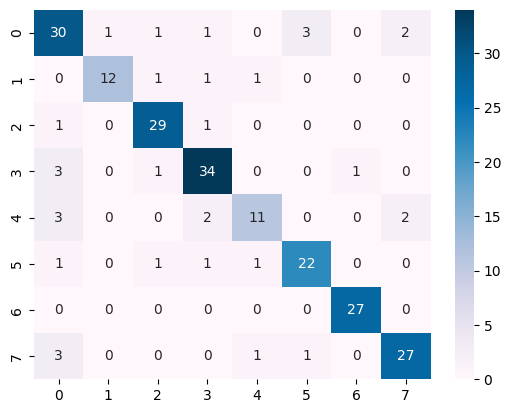

In [45]:
cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, cmap="PuBu", annot=True, fmt='.0f')
plt.show()

In [46]:
param_grid_rf = {
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8]}

RF_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv= 5)
RF_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [200, 500]})

In [47]:
print(RF_grid.best_params_)

{'max_depth': 8, 'n_estimators': 500}


In [48]:
r_forest = RandomForestClassifier(500,max_depth=8, random_state=5)
r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.801


In [49]:
p=precision_score(y_test, predicted, average='weighted')
print('precision : %.3f' % (p))

r=recall_score(y_test, predicted, average='weighted')
print('recall : %.3f' % (r))

f1=f1_score(y_test, predicted, average='weighted')
print('f1-score: %.3f' % (f1))

f1_w=f1_score(y_test, predicted, average='weighted')
print('weighted f1-score: %.3f' % (f1_w))

precision : 0.812
recall : 0.801
f1-score: 0.799
weighted f1-score: 0.799


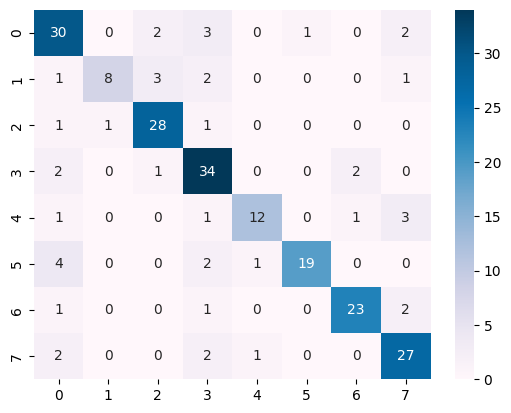

In [50]:
cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, cmap="PuBu", annot=True, fmt='.0f')
plt.show()

In [51]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
predicted = nb_model.predict(x_test)
score = nb_model.score(x_test, y_test)

print('Accuracy : %.3f' % (score))

Accuracy : 0.584


In [52]:
p=precision_score(y_test, predicted, average='weighted')
print('precision : %.3f' % (p))

r=recall_score(y_test, predicted, average='weighted')
print('recall : %.3f' % (r))

f1=f1_score(y_test, predicted, average='weighted')
print('f1-score: %.3f' % (f1))

f1_w=f1_score(y_test, predicted, average='weighted')
print('weighted f1-score: %.3f' % (f1_w))

precision : 0.591
recall : 0.584
f1-score: 0.580
weighted f1-score: 0.580


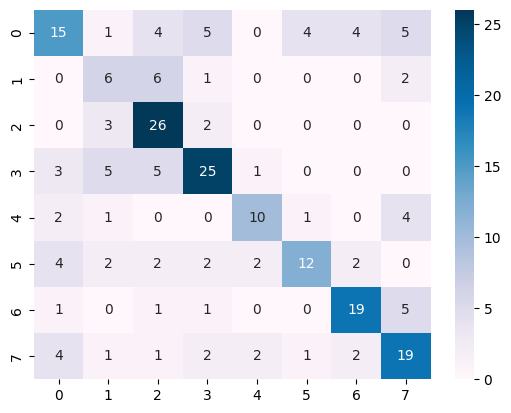

In [53]:
cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, cmap="PuBu", annot=True, fmt='.0f')
plt.show()

In [54]:
ets=time.time()
et=ets-st
print(f"Execution time:{et}s")

Execution time:1297.6306352615356s
